# Artificial Neural Network (ANN) general workflow

## Data import
input variables (features) = 'Surname' to 'Estimated Salary'  
output variables = 'Exited' (1: exited, 0: not exited, maintain the account)

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
display(dataset)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data preprocessing

In [10]:
# input variables
X = dataset.iloc[:, 3:13].values
# output variable
y = dataset.iloc[:, 13].values

######################################################################
# Encode categorical data
######################################################################
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#reference: https://qiita.com/yoshimo123/items/3717bd17ba74764dbc69

# X[:, 1] is 'Geography'. Convert the data into categorical (numerical and not ordinal) data
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
display(X)

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
# X[:, 2] is 'Gender'. Convert the data into binary data
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
display(X)

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [21]:
#convert the categorial data into the binary dataset
oneHotEncoder = OneHotEncoder(categorical_features=[1])
X = oneHotEncoder.fit_transform(X).toarray()
display(X[:, 0:5])

array([[  1.,   0.,   0., 619.,   0.],
       [  0.,   1.,   0., 608.,   0.],
       [  1.,   0.,   0., 502.,   0.],
       ...,
       [  1.,   0.,   0., 709.,   0.],
       [  1.,   0.,   1., 772.,   1.],
       [  1.,   0.,   0., 792.,   0.]])

In [22]:
#avoid dummy variable trap (remove one column from the categorical dummy variable set) a.k.a. multi-colinearity 多重共線性
# reference: https://www.quora.com/How-and-why-having-the-same-number-of-dummy-variables-as-categories-is-problematic-in-linear-regression-Dummy-variable-trap-Im-looking-for-a-purely-mathematical-not-intuitive-explanation-Also-please-avoid-using-the
X = X[:, 1:]
display(X[:, 0:5])

array([[  0.,   0., 619.,   0.,  42.],
       [  1.,   0., 608.,   0.,  41.],
       [  0.,   0., 502.,   0.,  42.],
       ...,
       [  0.,   0., 709.,   0.,  36.],
       [  0.,   1., 772.,   1.,  42.],
       [  0.,   0., 792.,   0.,  28.]])

In [27]:
#split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
display(X_train)

(8000, 11)

(2000, 11)

(8000,)

(2000,)

array([[1.0000000e+00, 0.0000000e+00, 6.6700000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.6383064e+05],
       [0.0000000e+00, 1.0000000e+00, 4.2700000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 5.7098000e+04],
       [0.0000000e+00, 0.0000000e+00, 5.3500000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.8563076e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.3800000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [1.0000000e+00, 0.0000000e+00, 5.9000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [0.0000000e+00, 1.0000000e+00, 6.2300000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

In [30]:
#feature scaling (standardadize the input variables. see http://ailaby.com/scaler/)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)
display(X_train)

array([[ 1.74309049, -0.5698444 ,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-0.57369368,  1.75486502, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.57369368, -0.5698444 , -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.57369368, -0.5698444 ,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [ 1.74309049, -0.5698444 , -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.57369368,  1.75486502, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

## make artifitial neural network (ANN) and train the model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#initialize the ANN model
classifier = Sequential()

#add the first input layer and the first hidden layer
'''
the following code making a warnming message because Keras has been updated to 2.0 after the lectures were created.
The code will still work since Keras is backward compatible.
classifier.add(Dense(units=6, input_dim=11, kernel_initializer="uniform", activation="relu"))
'''
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# classifier.add(Dropout(p = 0.1))

#add the second hidden layer
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
# classifier.add(Dropout(p = 0.1))

#add the output layer
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

#compile the ANN
# 'adam' is a name of the algorithm which optimizes the weights (parameters) of ANN 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#fit (train) the ANN to the tarining data set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

## test the model

In [41]:
#predict the test set result
y_pred = classifier.predict(X_test)
display("y_pred: ", y_pred)

#change the probability 0 to 1 to boolean at the threshold
threshold = 0.5
y_pred_bool = (y_pred > threshold)
display("y_pred_bool: ", y_pred_bool)

'y_pred: '

array([[0.26175764],
       [0.21238609],
       [0.1452385 ],
       ...,
       [0.28342175],
       [0.21629728],
       [0.11125094]], dtype=float32)

'y_pred_bool: '

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [35]:
from sklearn.metrics import confusion_matrix
confusionMatrixResult = confusion_matrix(y_test, y_pred_bool)
display(confusionMatrixResult)

array([[1535,   60],
       [ 250,  155]], dtype=int64)

From this result, we can say the model correctly predicted the output at (1535 + 155) / (1535 + 155 + 60 + 250) probability.

## make a prediction with one dataset

In [38]:
###################################################
# Input test data

#Geography: France
#Credit Score: 600
#Gender: Male
#Age: 40 years old
#Tenure: 3 years
#Balance: $60000
#Number of Products: 2
#Does this customer have a credit card ? Yes == 1
#Is this customer an Active Member: Yes == 1
#Estimated Salary: $50000
###################################################
#compare the variable dataset with X to figure out the way to convert categorical data
X_real1 = [[0., 0., 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
#scale the data by 0 mean and 1 sandard deviation
standardScaler = StandardScaler()
X_real1_scaled = standardScaler.fit_transform(X_real1)
y_real1_scaled_pred = classifier.predict(X_real1_scaled)
display("y_real1_scaled_pred: {}".format(y_real1_scaled_pred))
y_real1_scaled_pred_bool = (y_real1_scaled_pred > 0.5)
display("y_real1_scaled_pred_bool: {}".format(y_real1_scaled_pred_bool))


'y_real1_scaled_pred: [[0.2718036]]'

'y_real1_scaled_pred_bool: [[False]]'

## evaluate the ANN model
To mitigate and evaluate the influence of The Bias-Variance tradeoff to the model's performance , execute k-fold cross validation.

### The Bias-Variance tradeoff

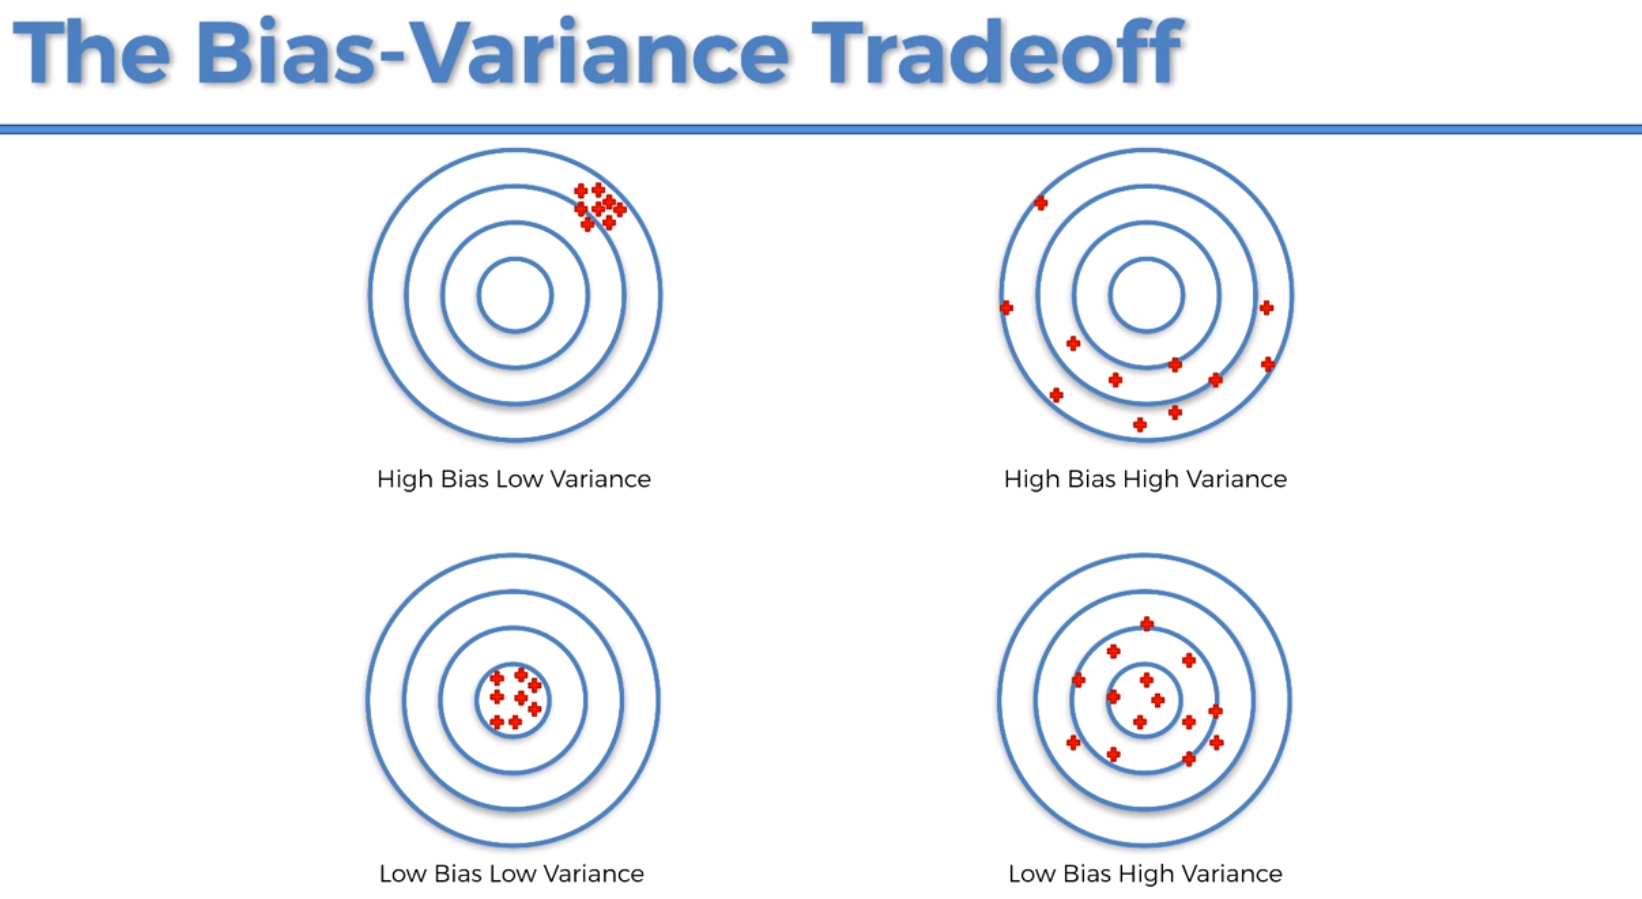

In [7]:
from IPython.display import Image, display_png
display_png(Image('download.png'))

Copyright: SuperDataScience

### 10-fold Cross Validation

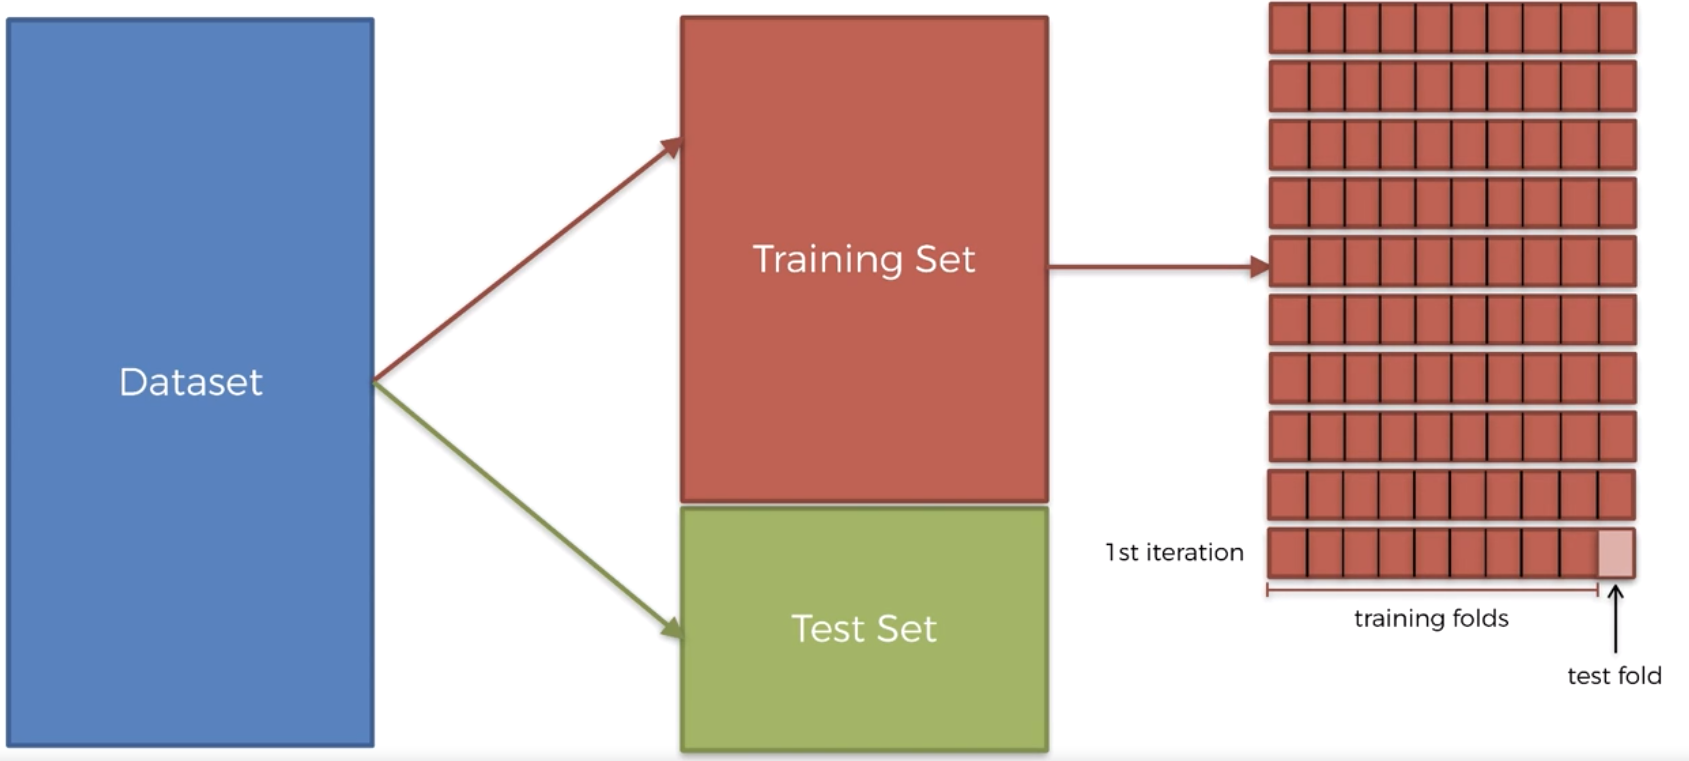

In [8]:
display_png(Image('download 2.png'))

Copyright: SuperDataScience

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# make a NN model
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)

# run training with 10 fold cross validation, which takes time.
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
'''
if you want to parallelize the calculation avobe, modify the code as this URL shows
https://stackoverflow.com/questions/44982374/cross-val-score-on-windows10-error-with-parallel-computing
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
class RunCross_val_scoreInPrallel():
    def __init__(self):
        accuraciesParallel = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
if __name__ == '__main__':
    RunCross_val_scoreInPrallel()
'''

In [53]:
display(type(accuracies))
display(accuracies)

mean = accuracies.mean()
std = accuracies.std()
display("mean:{}, std:{}".format(mean, std))

numpy.ndarray

array([0.86249999, 0.8325    , 0.83375   , 0.83624999, 0.86374999,
       0.83      , 0.82625   , 0.82624999, 0.84124999, 0.84625   ])

'mean:0.8398749944195151, std:0.013031810923451952'

We got a pretty small variance and high accuracy, which corresponds to the lower left figure above.

## Tune the ANN
Run the ANN model with different hyper parameters such as batch size, epochs and optimizer. You can also try more/different number of hidden layers, nodes num of folds (in k-fold cross validation), dropouts at each hidden layer and the aformentioned parameters by arranging the code.  
Both 'adam' and 'rmsprop' are based on schotastic gradient descent.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
# this command takes a lot of time (at least several hours)!
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [57]:
display("best_parameters: {}".format(best_parameters))
display("best_accuracy: {}".format(best_accuracy))

"best_parameters: {'batch_size': 25, 'optimizer': 'rmsprop', 'epochs': 500}"

'best_accuracy: 0.84875'

The best hyperparameter combination was 'batch_size': 25, 'optimizer': 'rmsprop', 'epochs': 500, which gives 0.84875 accuracy.